# Ricoh Gen 5 Waveform Filter for Excel Sheet

Filter Waveform for simulating the old amplifier with the new amplifier

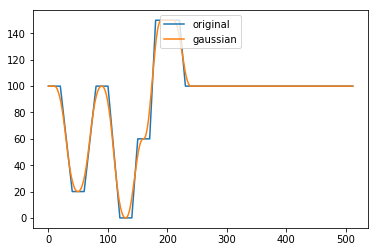

In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz
from scipy.ndimage import filters
import scipy.optimize as op
import matplotlib.pyplot as plt
 
def ssqe(sm, s, npts):
  return np.sqrt(np.sum(np.power(s-sm,2)))/npts
 
def testGauss(x, y, npts):
  b = gaussian(20, 10)
  #ga = filtfilt(b/b.sum(), [1.0], y)
  ga = filters.convolve1d(y, b/b.sum())
  plt.plot(x, ga)
  #print "gaerr", ssqe(ga, s, npts)
  return ga

values = [100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,96.0,92.0,88.0,84.0,80.0,76.0,72.0,68.0,64.0,60.0,56.0,52.0,48.0,44.0,40.0,36.0,32.0,28.0,24.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,24.0,28.0,32.0,36.0,40.0,44.0,48.0,52.0,56.0,60.0,64.0,68.0,72.0,76.0,80.0,84.0,88.0,92.0,96.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,90.0,85.0,80.0,75.0,70.0,65.0,60.0,55.0,50.0,45.0,40.0,35.0,30.0,25.0,20.0,15.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,18.0,24.0,30.0,36.0,42.0,48.0,54.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,69.0,78.0,87.0,96.0,105.0,114.0,123.0,132.0,141.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,145.0,140.0,135.0,130.0,125.0,120.0,115.0,110.0,105.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
]

npts = len(values)
end = len(values)
dt = end/float(npts)
nyf = 0.5/dt
sigma = 0.5 
x = np.linspace(0,end,npts)
y = values
plt.plot(x,y)
ga = testGauss(x, y, npts)
plt.legend(['original','gaussian'], loc='upper center')
plt.savefig("signal_filtered.png")
#print(ga)


In [7]:
#%matplotlib notebook
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz
from scipy.ndimage import filters
import scipy.optimize as op
import matplotlib.pyplot as plt
 
def ssqe(sm, s, npts):
  return np.sqrt(np.sum(np.power(s-sm,2)))/npts
 
def testGauss(x, y, s, npts):
  b = gaussian(39, 10)
  #ga = filtfilt(b/b.sum(), [1.0], y)
  ga = filters.convolve1d(y, b/b.sum())
  plt.plot(x, ga)
  print("gaerr", ssqe(ga, s, npts))
  return ga
 
def testButterworth(nyf, x, y, s, npts):
  b, a = butter(4, 1.5/nyf)
  fl = filtfilt(b, a, y)
  plt.plot(x,fl)
  print("flerr", ssqe(fl, s, npts))
  return fl
 
def testWiener(x, y, s, npts):
  wi = wiener(y, mysize=29, noise=0.5)
  plt.plot(x,wi)
  print("wieerr", ssqe(wi, s, npts))
  return wi
 
def testSpline(x, y, s, npts):
  sp = UnivariateSpline(x, y, s=240)
  plt.plot(x,sp(x))
  print("splerr", ssqe(sp(x), s, npts))
  return sp(x)
 
def plotPowerSpectrum(y, w):
  ft = np.fft.rfft(y)
  ps = np.real(ft*np.conj(ft))*np.square(dt)
  plt.plot(w, ps)
 
npts = 1024
end = 8
dt = end/float(npts)
nyf = 0.5/dt
sigma = 0.5 
x = np.linspace(0,end,npts)
r = np.random.normal(scale = sigma, size=(npts))
s = np.sin(2*np.pi*x)#+np.sin(4*2*np.pi*x)
y = s + r
plt.plot(x,s)
plt.plot(x,y,ls='none',marker='.')
ga = testGauss(x, y, s, npts)
fl = testButterworth(nyf, x, y, s, npts)
wi = testWiener(x, y, s, npts)
sp = testSpline(x, y, s, npts)
plt.legend(['true','meas','gauss','iir','wie','spl'], loc='upper center')
plt.savefig("signalvsnoise.png")
plt.clf()
w = np.fft.fftfreq(npts, d=dt)
w = np.abs(w[:int(npts/2+1)]) #only freqs for real fft
plotPowerSpectrum(s, w)
plotPowerSpectrum(y, w)
plotPowerSpectrum(ga, w)
plotPowerSpectrum(fl, w)
plotPowerSpectrum(wi, w)
plotPowerSpectrum(sp, w)
plt.yscale('log')
plt.xlim([0,10])
plt.ylim([1E-8,None])
plt.legend(['true','meas','gauss','iir','wie','spl'], loc='upper center')
plt.savefig("spectra.png")

<IPython.core.display.Javascript object>

gaerr 0.00345864743885
flerr 0.00336618466921
wieerr 0.00346601363147
splerr 0.00261200273279


<IPython.core.display.Javascript object>